In [1]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

data_train=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_8/Employee_Attrition_Prediction/train.csv')

data_train.head()

# Code ends here

,Id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,784,38,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,Female,65,2,3,Healthcare Representative,3,Married,8823,24608,0,Y,No,18,3,1,80,1,20,4,2,19,9,1,9,No
1,1383,36,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,Male,66,4,1,Laboratory Technician,2,Married,2810,9238,1,Y,No,22,4,2,80,0,5,3,3,5,4,0,2,No
2,71,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,No
3,1414,47,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,1,Male,84,3,3,Healthcare Representative,3,Single,8633,13084,2,Y,No,23,4,2,80,0,25,3,3,17,14,12,11,No
4,1184,54,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,2,Female,91,3,4,Manager,3,Married,17426,18685,3,Y,No,25,4,3,80,1,36,6,3,10,8,4,7,No


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1281 non-null   int64 
 1   Age                       1281 non-null   int64 
 2   BusinessTravel            1281 non-null   object
 3   DailyRate                 1281 non-null   int64 
 4   Department                1281 non-null   object
 5   DistanceFromHome          1281 non-null   int64 
 6   Education                 1281 non-null   int64 
 7   EducationField            1281 non-null   object
 8   EmployeeCount             1281 non-null   int64 
 9   EmployeeNumber            1281 non-null   int64 
 10  EnvironmentSatisfaction   1281 non-null   int64 
 11  Gender                    1281 non-null   object
 12  HourlyRate                1281 non-null   int64 
 13  JobInvolvement            1281 non-null   int64 
 14  JobLevel                

In [4]:
print('The null values in every feature are :\n', data_train.isnull().sum())

The null values in every feature are :
 Id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0


In [5]:
data_train.describe()

,Id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,806.099141,36.451991,803.854801,9.513661,2.892272,1.0,1026.784543,2.697892,66.149102,2.715066,2.036690,2.714286,6369.938329,14479.274005,2.667447,15.101483,3.145199,2.684621,80.0,0.768150,10.966432,2.773614,2.749415,6.820453,4.110070,2.169399,4.009368
std,461.095601,9.182920,405.180946,8.261545,1.042508,0.0,594.530378,1.107533,20.448039,0.731543,1.108658,1.107301,4680.508722,7096.176365,2.465755,3.602604,0.352439,1.093513,0.0,0.849697,7.783173,1.260068,0.715106,6.157865,3.590513,3.182992,3.538393
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,404.000000,30.000000,464.000000,2.000000,2.000000,1.0,497.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,8423.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,806.000000,35.000000,805.000000,7.000000,3.000000,1.0,1026.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4779.000000,14618.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1203.000000,42.000000,1162.000000,15.000000,4.000000,1.0,1548.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8008.000000,20682.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1600.000000,60.000000,1498.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data_train.shape

(1281, 36)

In [7]:
data_train.loc[data_train['Attrition']=='Yes', 'Attrition'] = 1
data_train.loc[data_train['Attrition']=='No', 'Attrition'] = 0

In [8]:
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition']
numerical_columns: ['Id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
data_train['Department'].value_counts()

Research & Development    825
Sales                     402
Human Resources            54
Name: Department, dtype: int64

In [10]:
data_train['HourlyRate'].value_counts()

84    29
32    28
57    27
48    26
52    26
      ..
70    12
31    11
51    11
68    10
53     8
Name: HourlyRate, Length: 71, dtype: int64

In [11]:
data_train['Attrition'].value_counts()

0    984
1    297
Name: Attrition, dtype: int64

In [12]:
data_train['MaritalStatus'].value_counts()

Married     579
Single      438
Divorced    264
Name: MaritalStatus, dtype: int64

In [13]:
data_train['Gender'].value_counts()

Male      773
Female    508
Name: Gender, dtype: int64

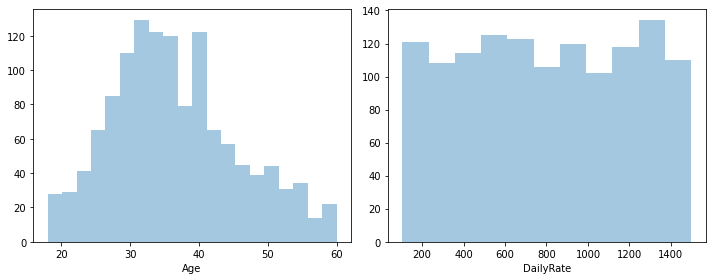

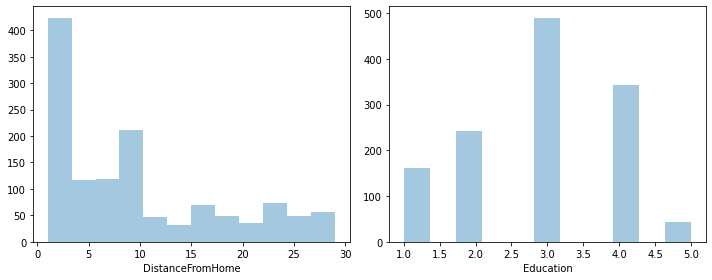

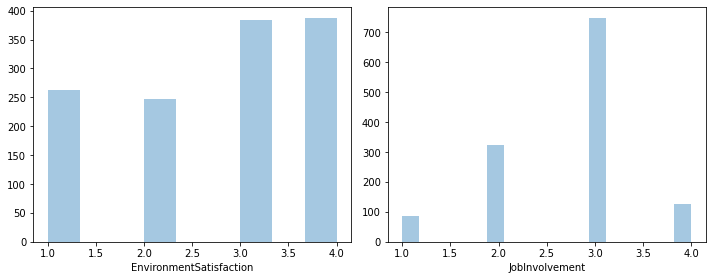

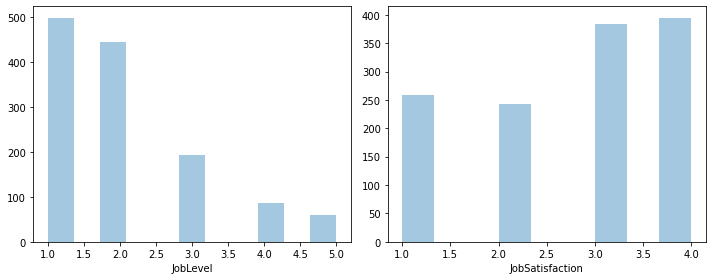

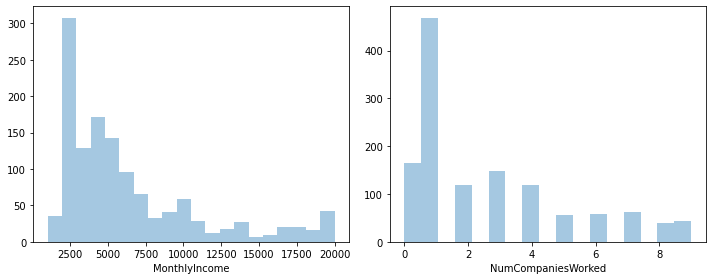

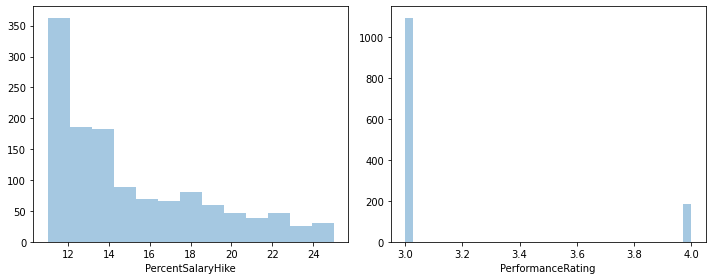

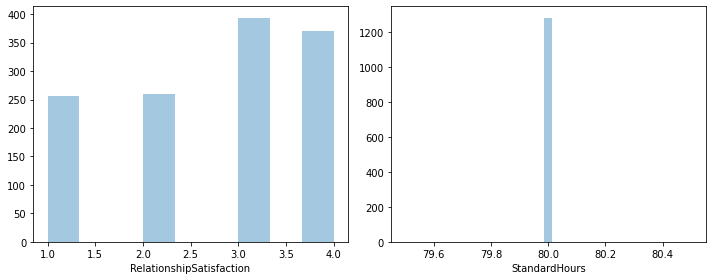

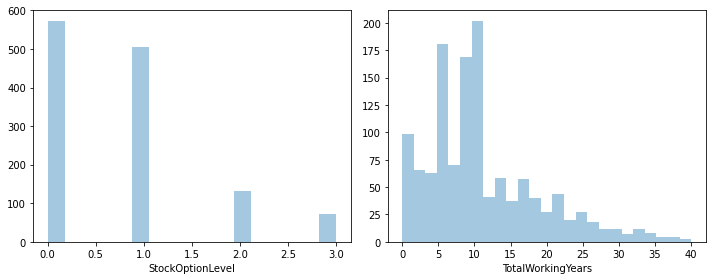

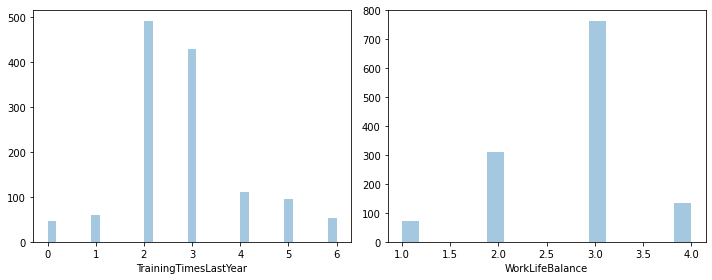

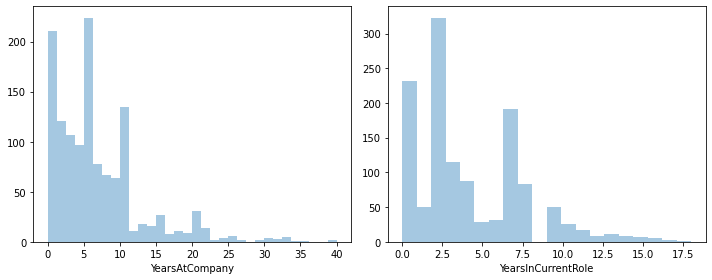

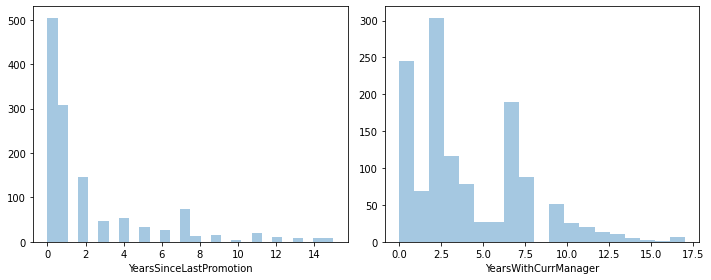

In [14]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data_train[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(data_train[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data_train[num_cols[i]], kde=False)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

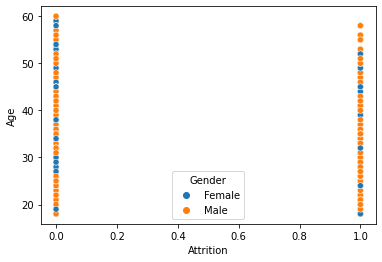

In [15]:
sns.scatterplot(data=data_train, x= "Attrition",y="Age", hue="Gender")

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='YearsAtCompany'>

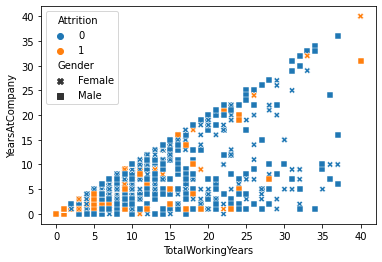

In [16]:
markers = {"Male": "s", "Female": "X"}
sns.scatterplot(data=data_train, x="TotalWorkingYears", y='YearsAtCompany', style="Gender",hue='Attrition', markers=markers)

<AxesSubplot:xlabel='Age', ylabel='WorkLifeBalance'>

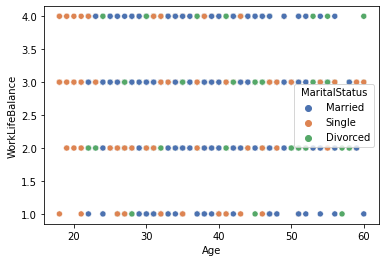

In [17]:
sns.scatterplot(data=data_train, x="Age", y="WorkLifeBalance", hue="MaritalStatus", palette="deep")

In [18]:
data_train.corr()

,Id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Id,1.000000,-0.033136,-0.037767,0.071061,0.014576,NaN,0.833947,-0.033288,0.024611,-0.063347,-0.026431,-0.035294,-0.029692,0.043409,0.006294,-0.050150,-0.039096,-0.080788,NaN,0.007227,-0.036719,0.021389,-0.010698,-0.032889,-0.033630,-0.009439,-0.032871
Age,-0.033136,1.000000,-0.025752,-0.002156,0.221513,NaN,0.018200,-0.025125,0.039541,0.039771,0.523336,-0.005268,0.513115,0.017182,0.309444,0.004020,0.000949,0.063455,NaN,0.072515,0.688406,-0.006882,-0.010340,0.332465,0.225107,0.239191,0.221073
DailyRate,-0.037767,-0.025752,1.000000,-0.013921,-0.025095,NaN,-0.035203,0.030626,0.026947,0.015332,-0.008611,0.037258,-0.000996,-0.058652,0.047535,-0.019298,-0.015614,-0.023874,NaN,0.035522,-0.010843,-0.001333,-0.039484,-0.062021,0.007263,-0.051850,-0.041359
DistanceFromHome,0.071061,-0.002156,-0.013921,1.000000,0.023302,NaN,0.025867,-0.053383,0.035517,-0.007564,0.009115,0.008369,-0.016132,0.011824,-0.042884,0.061822,0.061031,-0.008257,NaN,0.034674,-0.002623,-0.024844,-0.042728,0.009278,0.018346,0.013177,0.021750
Education,0.014576,0.221513,-0.025095,0.023302,1.000000,NaN,0.049957,-0.030916,0.027251,0.071379,0.112250,-0.018563,0.105758,-0.031424,0.107925,-0.014144,-0.031815,-0.001043,NaN,0.022053,0.152164,-0.030474,0.016159,0.078887,0.068289,0.074722,0.071223
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.833947,0.018200,-0.035203,0.025867,0.049957,NaN,1.000000,-0.003747,0.045809,-0.009027,0.007162,-0.052028,0.012637,0.009530,-0.005627,-0.017320,-0.025171,-0.079487,NaN,0.068233,0.013145,0.047406,0.040176,0.008301,0.023777,0.015462,0.013927
EnvironmentSatisfaction,-0.033288,-0.025125,0.030626,-0.053383,-0.030916,NaN,-0.003747,1.000000,-0.046305,0.031561,-0.005600,-0.006734,-0.004414,0.016912,-0.049691,-0.032058,-0.025635,0.011578,NaN,0.011850,-0.022022,-0.009859,0.027643,0.016898,0.031158,0.040236,0.021854
HourlyRate,0.024611,0.039541,0.026947,0.035517,0.027251,NaN,0.045809,-0.046305,1.000000,0.056323,-0.028879,-0.089277,-0.013986,0.001518,0.034562,-0.010959,-0.017316,0.012412,NaN,0.022945,0.001642,-0.016487,-0.030034,-0.020821,-0.020591,-0.047610,-0.036915
JobInvolvement,-0.063347,0.039771,0.015332,-0.007564,0.071379,NaN,-0.009027,0.031561,0.056323,1.000000,-0.015035,-0.019565,-0.018595,-0.022562,0.031019,-0.001173,-0.018188,0.037001,NaN,0.021838,0.001749,0.004551,0.027682,-0.036513,0.007786,-0.026227,0.014614


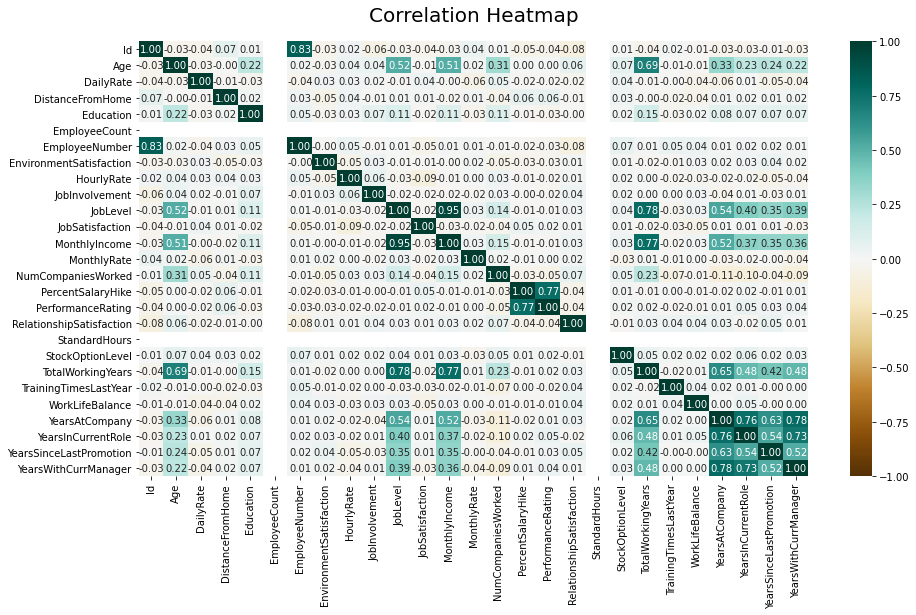

In [19]:
plt.figure(figsize=[15,8])
heatmap = sns.heatmap(data_train.corr(), vmin=-1, vmax=1,annot=True,fmt='.2f', cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

In [20]:
data_train.drop(['Id','EmployeeNumber','Over18','EmployeeCount','StandardHours'],1, inplace=True)

In [21]:
categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']

for column in categorical_columns:
    data_train[column]=data_train[column].astype('category').cat.codes
    
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1281 non-null   int64
 1   BusinessTravel            1281 non-null   int8 
 2   DailyRate                 1281 non-null   int64
 3   Department                1281 non-null   int8 
 4   DistanceFromHome          1281 non-null   int64
 5   Education                 1281 non-null   int64
 6   EducationField            1281 non-null   int8 
 7   EnvironmentSatisfaction   1281 non-null   int64
 8   Gender                    1281 non-null   int8 
 9   HourlyRate                1281 non-null   int64
 10  JobInvolvement            1281 non-null   int64
 11  JobLevel                  1281 non-null   int64
 12  JobRole                   1281 non-null   int8 
 13  JobSatisfaction           1281 non-null   int64
 14  MaritalStatus             1281 non-null 

### Model building

- Now let's come to the actual task, using Decision Tree/Ensemble Technique, predict the `Attrition`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the [ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [22]:
X=data_train.drop(['Attrition'], axis=1)
y=data_train['Attrition'].copy()

In [23]:
import scipy.stats as scs
# Code starts here

features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})
# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]
# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]

print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
    X[i] = np.log1p(X[i])

Positively Skewed Features 
                    Features  Skewness
11                 JobLevel  1.049453
15            MonthlyIncome  1.418818
17       NumCompaniesWorked  1.050641
20        PerformanceRating  2.014190
22         StockOptionLevel  1.011235
23        TotalWorkingYears  1.134861
26           YearsAtCompany  1.836721
28  YearsSinceLastPromotion  1.977145
**************************************************
Negatively Skewed Features 
          Features  Skewness
1  BusinessTravel -1.377595


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('The AUC_ROC_score for a logistic regression model is :' ,roc_auc_score(y_test,y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

The AUC_ROC_score for a logistic regression model is : 0.5294576329925489
The accuracy for logistic regression is :  0.7821011673151751


## Decision Tree Classifier

In [26]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test) 
print("Decision tree accuracy: ",accuracy_score(y_test,tree_predictions))
print('The AUC_ROC_score for a Decision tree model is :' ,roc_auc_score(y_test,tree_predictions))

Decision tree accuracy:  0.8015564202334631
The AUC_ROC_score for a Decision tree model is : 0.6641829838849419


In [27]:
tree_params = {'max_depth': range(2, 11)}
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),tree_params, cv=5)                  
locally_best_tree.fit(X_train, y_train)
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)
tuned_tree = DecisionTreeClassifier(max_depth=2, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_test, tuned_tree_predictions))
print('The AUC_ROC_score for a Tuned Decision tree model is :' ,roc_auc_score(y_test,tuned_tree_predictions))

Best params: {'max_depth': 5}
Best cross validaton score 0.7998278335724534
Decision tree Accuracy after tuning:  0.7782101167315175
The AUC_ROC_score for a Tuned Decision tree model is : 0.5574857043839889


## Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a decision tree model as a meta classifier.

In [28]:
from mlxtend.classifier import StackingClassifier

classifier1 = LogisticRegression(C=0.1)
classifier2= DecisionTreeClassifier(random_state=2,criterion='entropy',max_depth=4)

# classifier
classifier_list=[classifier1,classifier2]

# meta classifier
m_classifier=DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=6)

# Code starts here

sclf = StackingClassifier(classifiers=classifier_list, meta_classifier=m_classifier)

sclf.fit(X_train,y_train)

y_pred_sclf = sclf.predict(X_test)
# s_score=sclf.score(X_train,y_train)
# print("Training score: %.2f " % s_score)

s_score=sclf.score(X_test,y_test)
print("Test score: %.2f " % s_score)
print('AUC_ROC_score for Stacking Classifier is ',roc_auc_score(y_test,y_pred))


Test score: 0.80 
AUC_ROC_score for Stacking Classifier is  0.5294576329925489


## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='gini', max_depth= 3, max_features= 'auto',n_estimators=12)
# Fit the model
rfc.fit(X_train,y_train)
# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)
# accuracy
accuracy = rfc.score(X_test,y_test)
# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print('AUC_ROC score for Random Forest is: ',roc_score)
print(classification_report(y_test,y_pred_rf))

Accuracy is  0.7898832684824902
AUC_ROC score for Random Forest is:  0.5466990123028937
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       199
           1       0.75      0.10      0.18        58

    accuracy                           0.79       257
   macro avg       0.77      0.55      0.53       257
weighted avg       0.78      0.79      0.72       257



## Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [30]:
rfc = RandomForestClassifier(random_state=2)
param_grid = { 
'n_estimators': [11,12,13],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
}
# grid search cv

grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

grid_search_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 12}

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='entropy', max_depth= 8,max_features= 'auto', n_estimators= 12)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred_rf)

print('AUC_ROC score is ',roc_score)
print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

AUC_ROC score is  0.7582741292670246
Accuracy is  0.8715953307392996
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       199
           1       0.82      0.55      0.66        58

    accuracy                           0.87       257
   macro avg       0.85      0.76      0.79       257
weighted avg       0.87      0.87      0.86       257



## Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [32]:
from sklearn.ensemble import VotingClassifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='soft')
# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)
# predict on test
y_pred_vot = voting_clf_hard.predict(X_test)
# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)

print("AUC-ROC score for Voting Classifier is:", roc_auc_score(y_test,y_pred_vot))
print("Accuracy score for Voting Classifier is:", accuracy_score(y_test,y_pred_vot))
print("Classification Report for Voting Classifier is:",classification_report(y_test,y_pred_vot))

AUC-ROC score for Voting Classifier is: 0.8096517068099117
Accuracy score for Voting Classifier is: 0.8754863813229572
Classification Report for Voting Classifier is:               precision    recall  f1-score   support

           0       0.91      0.93      0.92       199
           1       0.74      0.69      0.71        58

    accuracy                           0.88       257
   macro avg       0.83      0.81      0.82       257
weighted avg       0.87      0.88      0.87       257



## Let's check how a bagging classifier using a Decision Tree performs on our data

In [33]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier
# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)
# Fit the model on training data
bagging_clf.fit(X_train,y_train)
# Predicted values of X_test
y_pred_bagging = bagging_clf.predict(X_test)
# accuracy 
print('Accuracy for Bagging Classifier is ',bagging_clf.score(X_test,y_test))
# roc_score
score_bagging = roc_auc_score(y_test,y_pred_bagging)
print('AUC_ROC_score for bagging classifier is ',score_bagging)
print(classification_report(y_test,y_pred_bagging))

Accuracy for Bagging Classifier is  0.7782101167315175
AUC_ROC_score for bagging classifier is  0.5574857043839889
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       199
           1       0.53      0.16      0.24        58

    accuracy                           0.78       257
   macro avg       0.66      0.56      0.56       257
weighted avg       0.74      0.78      0.73       257



### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [34]:
# Code Starts here
data_test=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_8/Employee_Attrition_Prediction/test.csv')

In [35]:
data_test.shape

(321, 35)

In [36]:


data_test.drop(['EmployeeNumber','Over18','EmployeeCount','StandardHours'],1, inplace=True)

# Code ends here

In [37]:
categorical_columns = [c for c in data_test.columns 
                       if data_test[c].dtype.name == 'object']

for column in categorical_columns:
    data_test[column]=data_train[column].astype('category').cat.codes
    
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        321 non-null    int64
 1   Age                       321 non-null    int64
 2   BusinessTravel            321 non-null    int8 
 3   DailyRate                 321 non-null    int64
 4   Department                321 non-null    int8 
 5   DistanceFromHome          321 non-null    int64
 6   Education                 321 non-null    int64
 7   EducationField            321 non-null    int8 
 8   EnvironmentSatisfaction   321 non-null    int64
 9   Gender                    321 non-null    int8 
 10  HourlyRate                321 non-null    int64
 11  JobInvolvement            321 non-null    int64
 12  JobLevel                  321 non-null    int64
 13  JobRole                   321 non-null    int8 
 14  JobSatisfaction           321 non-null    

In [38]:
# Storing the id from the test file
id_ = data_test['Id']

# Dropping the same columns from the test data
data_test.drop(['Id'],1,inplace=True)

# Applying rfe on test data

y_pred_test= rfc.predict(data_test)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'Attrition':y_pred_test})

final_submission.loc[final_submission['Attrition']==1, 'Attrition'] = 'Yes'
final_submission.loc[final_submission['Attrition']==0, 'Attrition'] = 'No'

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)